In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartdisease/heart.csv


In [2]:
import warnings
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

import seaborn as sns
# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (20, 15)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("white")
#styledict, or one of {darkgrid, whitegrid, dark, white, ticks}

<p style="background-color:#blue;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> Heart Attack Risk Prediction <span style='font-size:28px; background-color:blue ;'>  </span></p>

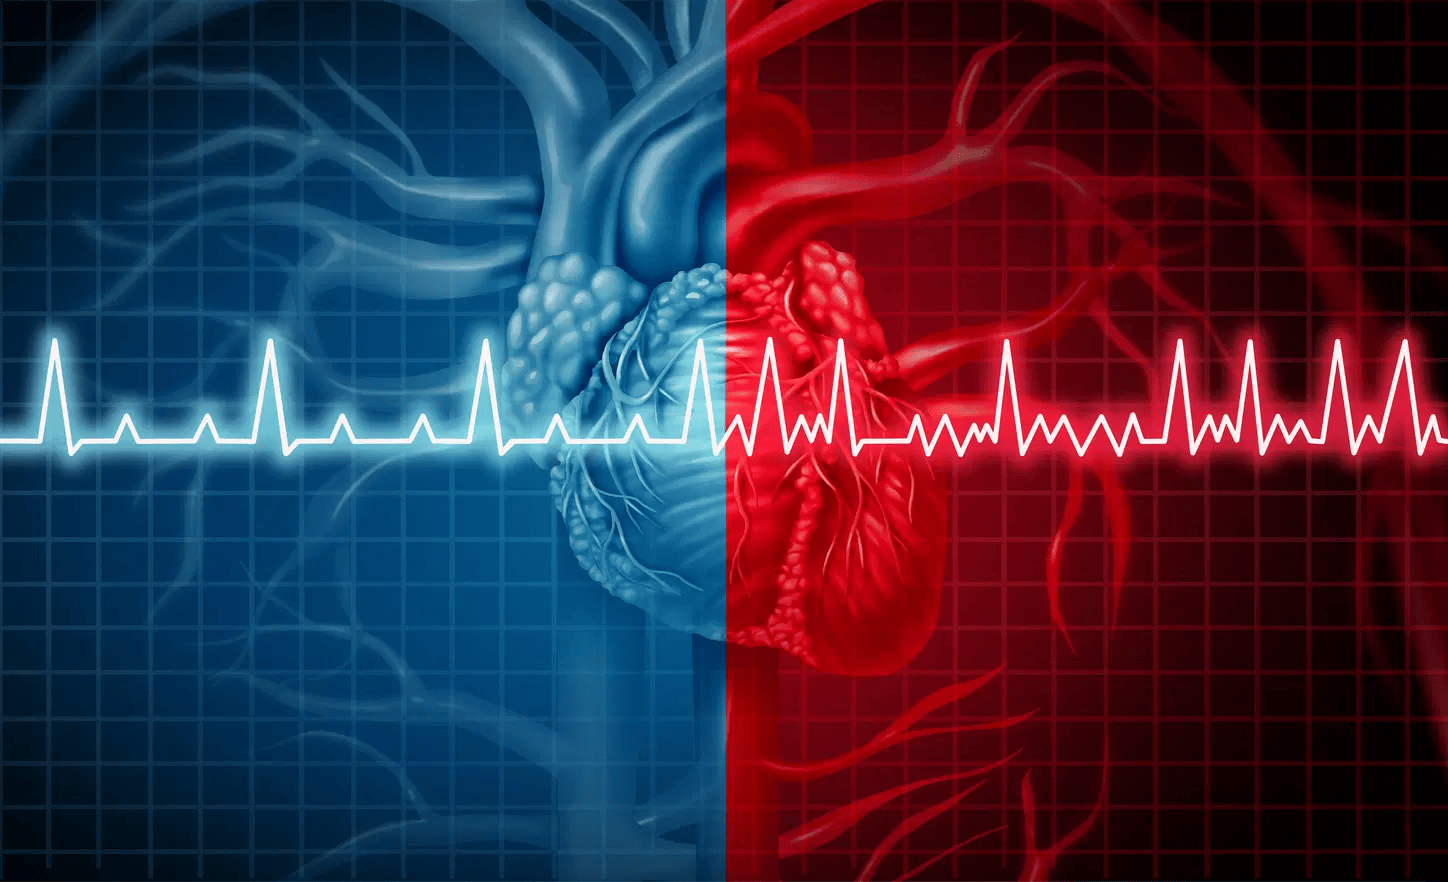

# <p style="background-color:#blue;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> 📖 DOMAIN KNWOLEDGE 📖 <span style='font-size:28px; background-color:blue ;'>  </span></p>

A **heart attack (myocardial infarction)** occurs when blood flow to the heart is blocked, leading to tissue damage. Important points about heart attack risk include:

- **Risk factors**: Age, gender, family history, high blood pressure, high cholesterol, smoking, obesity, diabetes, and a sedentary lifestyle increase the risk.

- **Symptoms**: Chest pain, shortness of breath, discomfort in the jaw, neck, arms, or back.

- **Prevention**: Healthy lifestyle choices like exercise, balanced diet, weight management, quitting smoking, and stress management.

- **Early intervention**: Prompt medical attention is crucial to minimize damage and improve outcomes.

Please, consult healthcare professionals for personalized guidance and information.

# <p style="background-color:#blue;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> 🎯 LEARNING GOALS 🎯 <span style='font-size:28px; background-color:blue ;'>  </span></p>

**Predicting Heart Attack Risk in Data Science** is important for early intervention, personalized healthcare, efficient resource allocation, public health planning, and advancing medical research.

In this work, we will tackle the following points:

* **Goal 1: Exploratory Data Analysis** 🩺
    - Gather a comprehensive dataset with relevant information on individuals for heart attack risk prediction.
    - Perform exploratory data analysis (EDA) to understand the data's distribution and identify any missing values, outliers, or correlations.
    - Gain insights into the dataset to inform feature selection and engineering.


* **Goal 2: Feature Engineering** 👨‍💻
    - Select the most informative features for predicting heart attack risk based on domain knowledge and EDA findings.
    - Create new features by combining or transforming existing ones to enhance the predictive power of the models.


* **Goal 3: Standardization**: ⚖️
    - Normalize or standardize numerical features to ensure they are on a similar scale, aiding model convergence during training.


* **Goal 4: Model Building** 📈
    - Implement and evaluate various machine learning algorithms suitable for heart attack risk classification, such as logistic regression, decision trees, random forests, SVM, or gradient boosting algorithms.
    - Split the dataset into training and testing sets to assess model performance accurately.
    - Train and fine-tune the selected algorithms, optimizing their hyperparameters for improved predictive accuracy.


* **Goal 5: Predictions** 🔭
    - Evaluate the trained models using appropriate metrics, such as accuracy, precision, recall, F1-score, or AUC-ROC.
    - Select the best-performing model based on evaluation results and its ability to accurately predict heart attack risk.
    - Apply the chosen model to make predictions on new, unseen data to estimate the risk of heart attacks for individuals.
    
Let's Go !! ✌️😎✨

# <p style="background-color:#blue;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> 🚀 ONBOARDING 🚀 <span style='font-size:28px; background-color:blue ;'>  </span></p>

Let us import the necessary liabraries.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# <p style="background-color:#blue;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> 🩺 EXPLORATORY DATA ANALYSIS 🩺 <span style='font-size:28px; background-color:blue ;'>  </span></p>

Let's import the dataset from Kaggle:

In [4]:
# Overview of the data
df = pd.read_csv("/kaggle/input/heartdisease/heart.csv")
df = df.drop(['oldpeak','slp','thall'],axis=1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


**In our dataset, we have the following features:**

- Age: Age of the patient.

- Sex: Sex of the patient.

- exang: Exercise-induced angina (1 = yes; 0 = no).

- ca: Number of major vessels (0-3).

- cp: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).

- trtbps: Resting blood pressure (in mm Hg).

- chol: Cholesterol level in mg/dl fetched via BMI sensor.

- fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

- rest_ecg: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = probable or definite left ventricular hypertrophy).

- thalach: Maximum heart rate achieved.

**The target variable indicates the risk of heart attack:**

- target: 0 = low risk of heart attack, 1 = high risk of heart attack.

These features provide valuable information for analyzing the risk factors associated with heart attacks and can be used for developing predictive machine learning models. 

Then, we look at it's shape.

In [5]:
# Shape of the data
df.shape

(303, 11)

The dataset consits of 303 rows of patients information and 11 columns representing the covariates or the risk factors.

In [6]:
# Checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

As one of my former students would say, SWEET! There are no missing values or null observations in our dataset. 

In [7]:
# Assessing correlation beteween risk factors
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


> **Use a picture. It's worth a thousand numbers. ~Emmanuel (2023) Haha! 😂**

<Axes: >

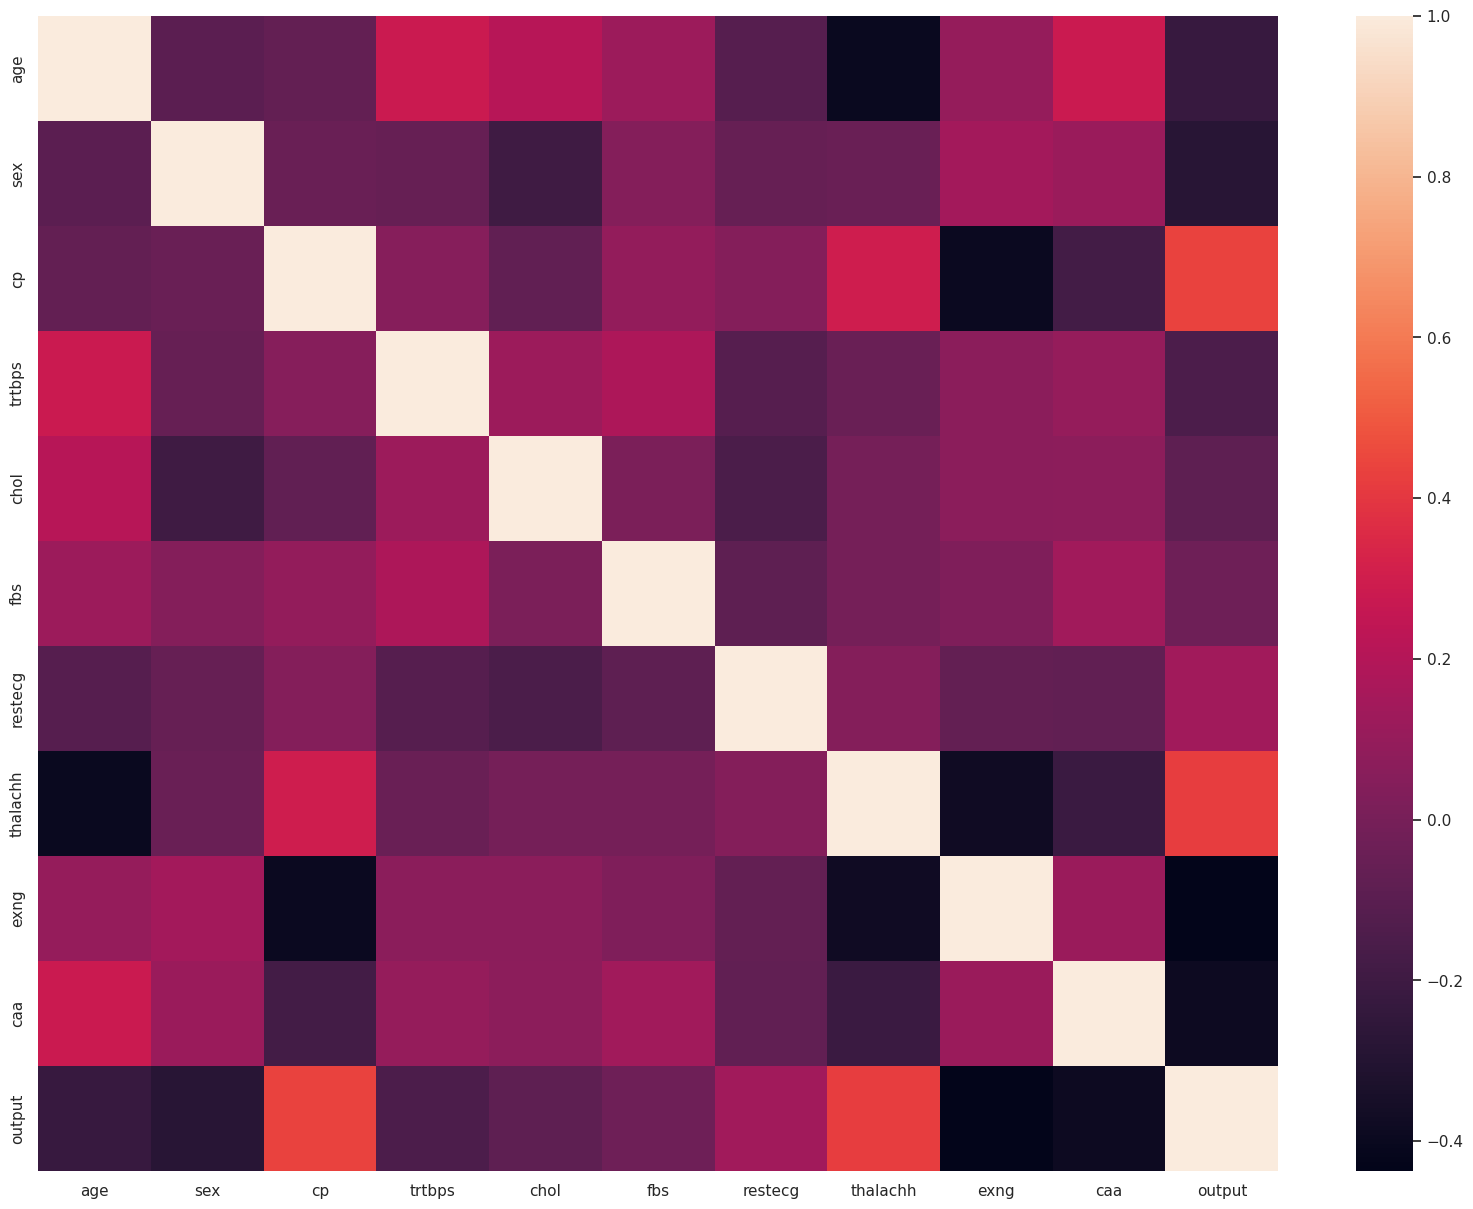

In [8]:
# Heatmap for all the numerical data including the taget feature
sns.heatmap(df.corr())

<Axes: >

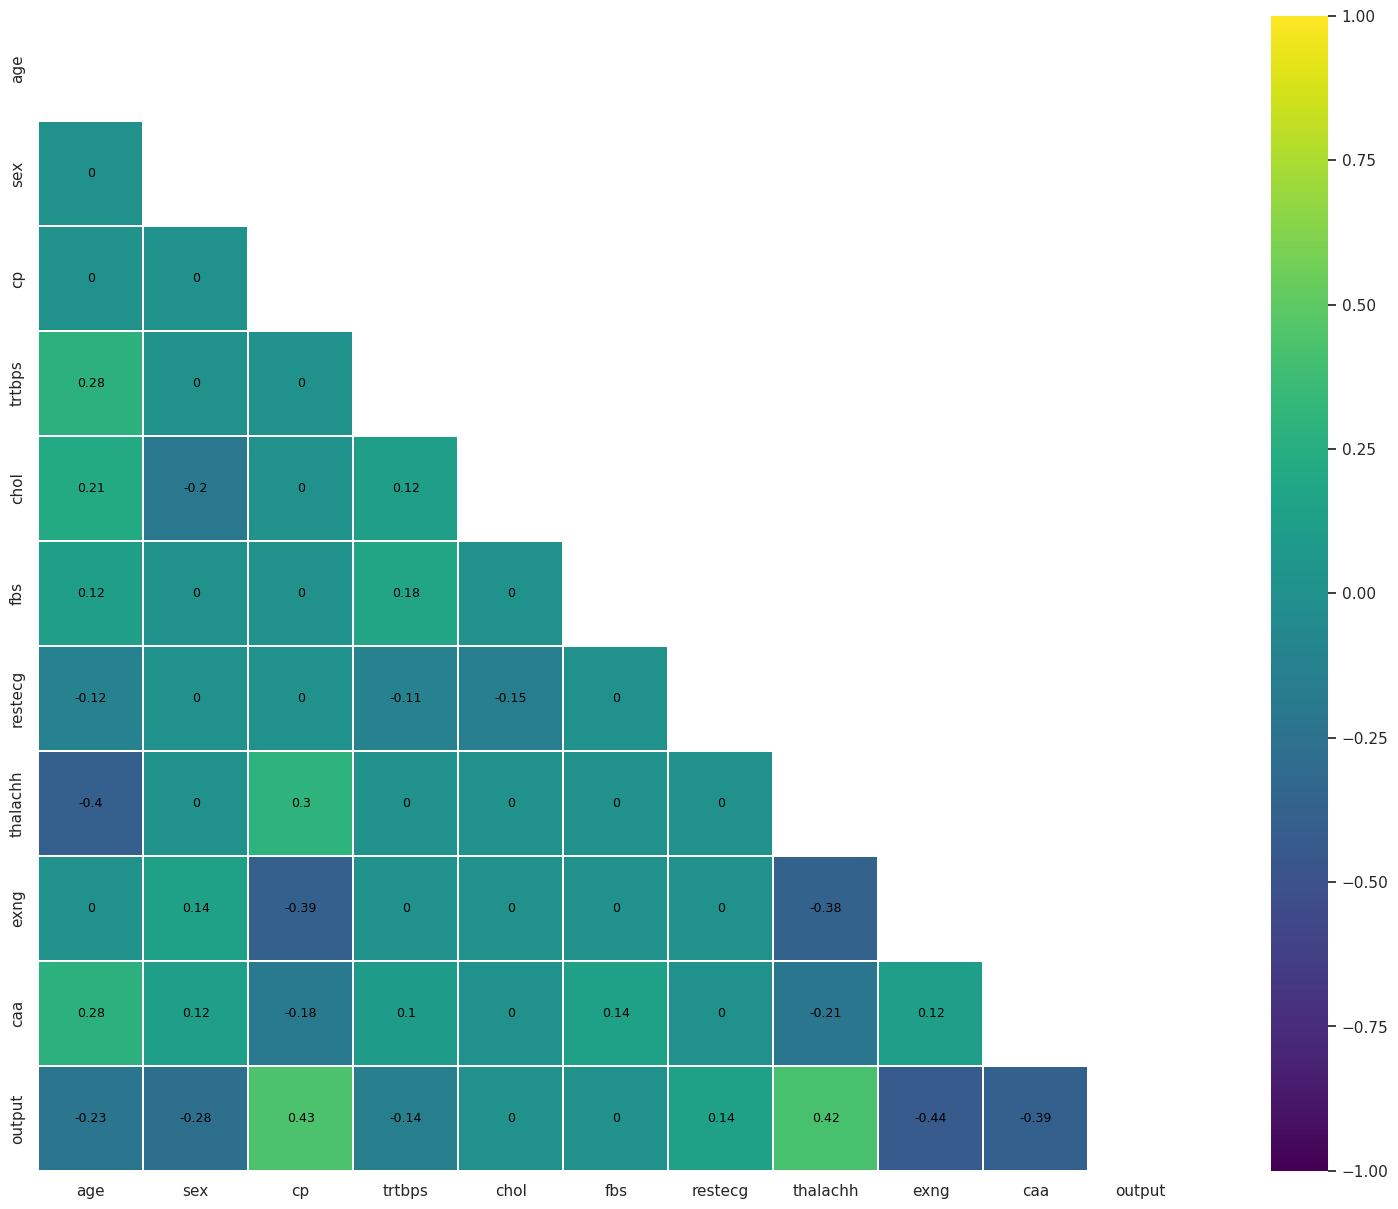

In [9]:
# Heatmap for all the numerical data including the taget feature

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.1) & (corr_matrix > -0.1)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

The latter heatmap provides a clearer visual representation, revealing that the correlation among the risk factors is not significantly high. 

Therefore, there is no need to drop any specific risk factors based on their correlation.

Now, we will conduct multivariate analysis on our features, taking into account both categorical and continuous variables. 

In the first phase, we will analyze the categorical feature, while in the second phase, we will focus on the continuous variables. 

This approach allows us to gain comprehensive insights and explore relationships among different feature types in our dataset.

<Axes: title={'center': 'Age of Patients'}, xlabel='age', ylabel='count'>

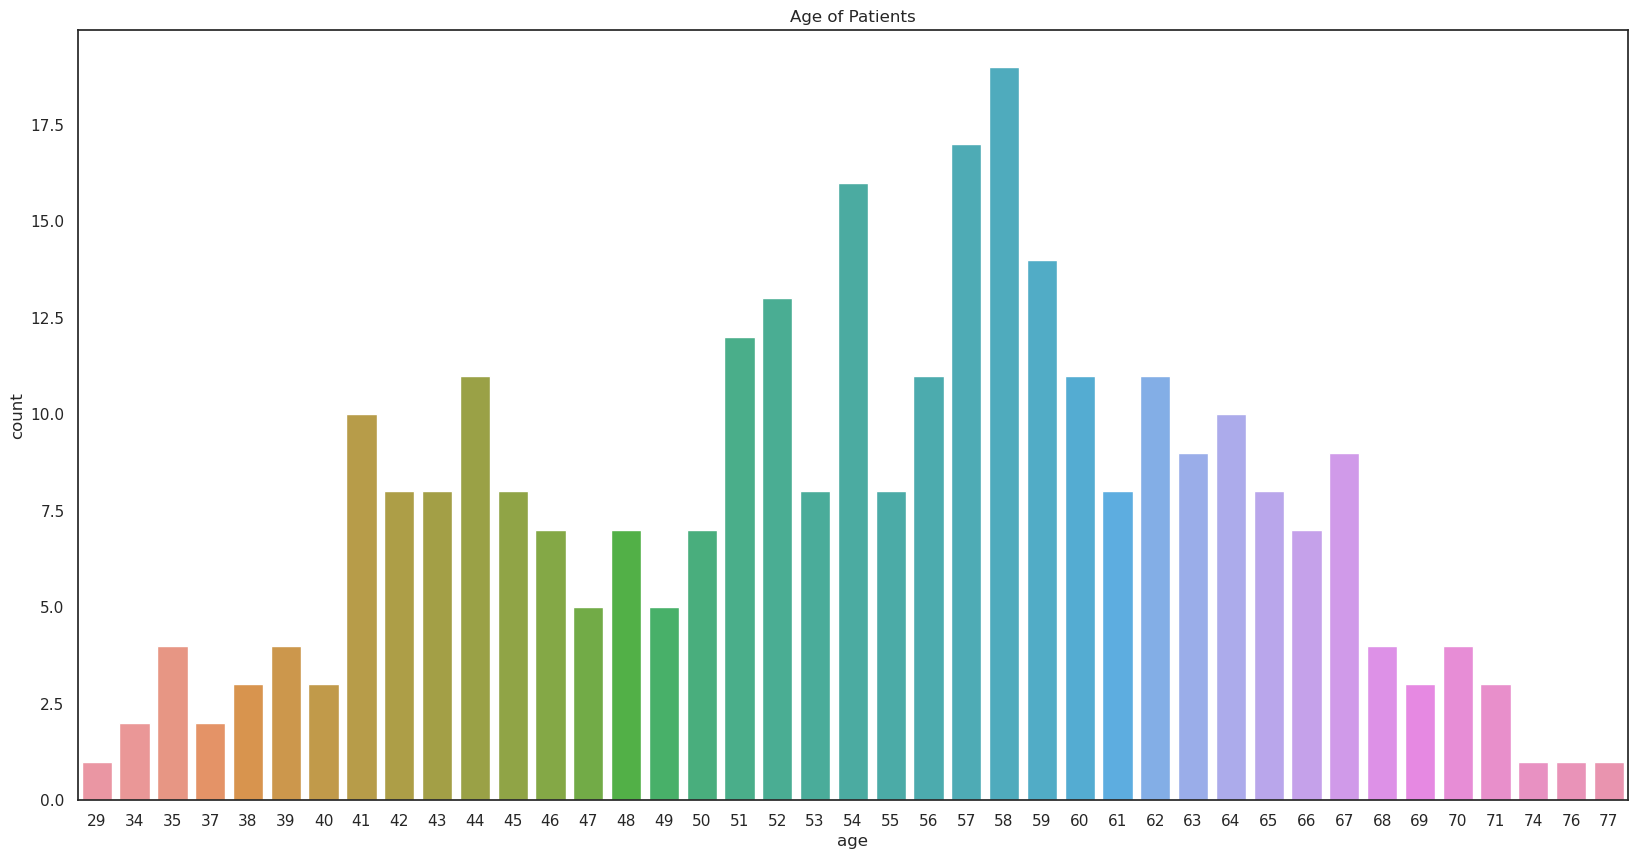

In [10]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

The majority of patients in the dataset fall within the age group of 51-67 years.

<Axes: title={'center': 'Sex of Patients, 0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

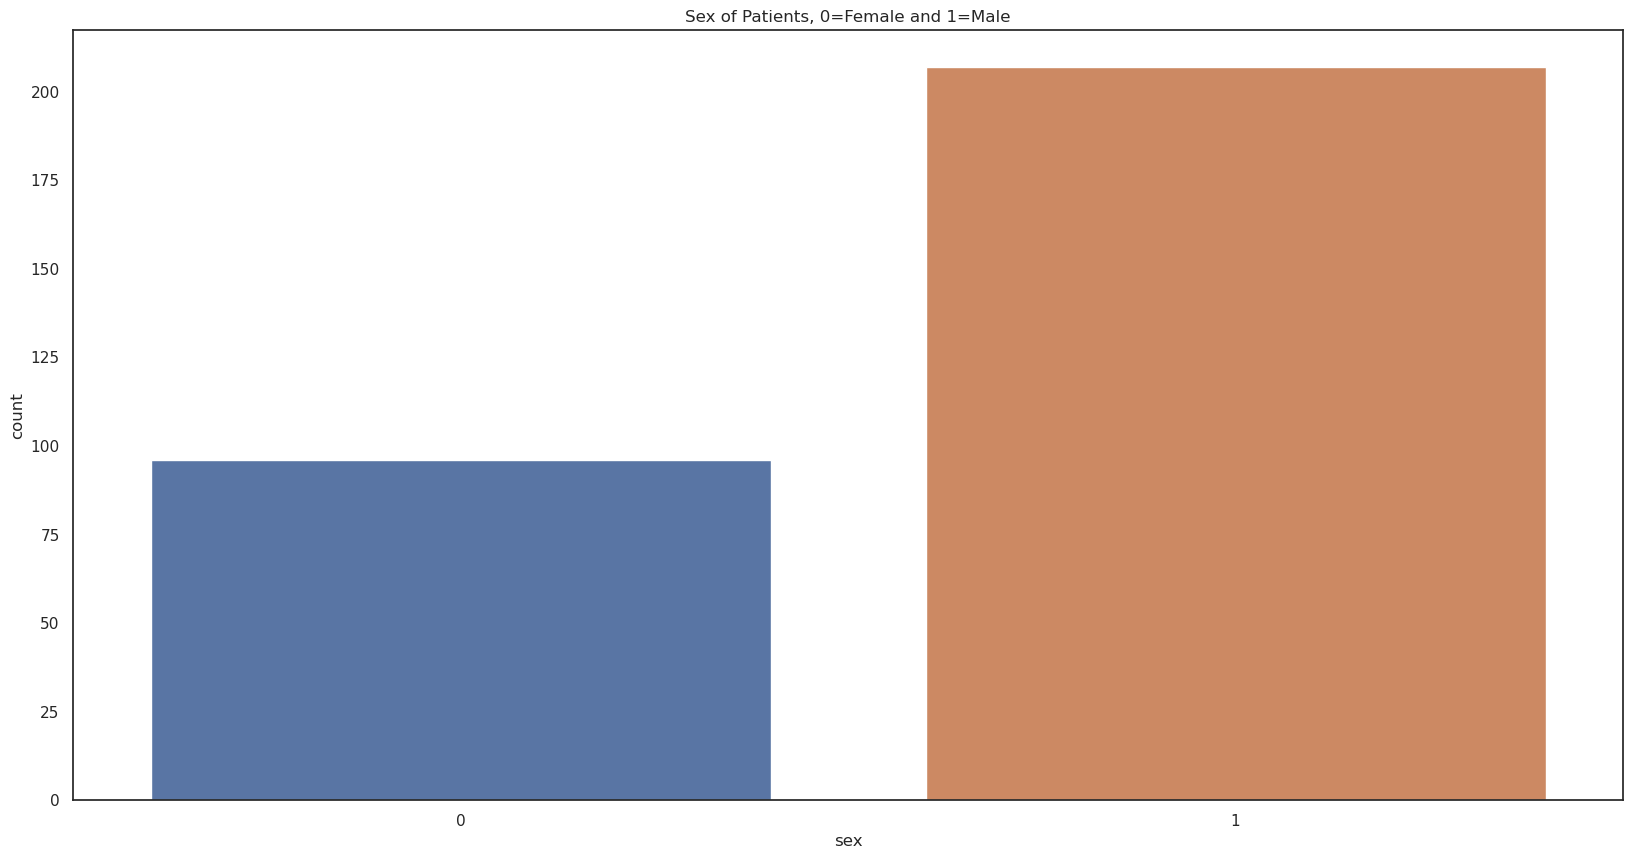

In [11]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients, 0=Female and 1=Male")

sns.countplot(x='sex',data=df)

Proceeding with the analysis should be done with caution due to the significant imbalance in the proportion of males and females in the dataset. 

Such a gender imbalance can potentially introduce bias and affect the generalizability of the results. It is advisable to address this issue by either:

    1. Collecting additional data to balance the gender representation or,
    
    2. Employing appropriate sampling or weighting techniques to mitigate the impact of the imbalance. 

By ensuring a more balanced dataset, the analysis can yield more reliable and unbiased insights.

Thereofore, let's try the second approach, that's a resampling.

In [12]:
from sklearn.utils import resample

# Split the data by gender (assuming 0 represents female and 1 represents male)
female_samples = df[df["sex"] == 0]
male_samples = df[df["sex"] == 1]

# Determine the size of the smaller class (female in this case)
minority_samples_size = min(len(female_samples), len(male_samples))

# Resample the larger class (male) to match the size of the smaller class
resampled_male_samples = resample(male_samples, n_samples=minority_samples_size, random_state=42)

# Combine the resampled male samples with the original female samples
resampled_df = pd.concat([resampled_male_samples, female_samples])

# Reset the index of the resampled DataFrame
resampled_df.reset_index(drop=True, inplace=True)

# Now we can proceed with the analysis using the resampled data resampled_X
resampled_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,40,1,0,110,167,0,0,114,1,0,0
1,56,1,0,130,283,1,0,103,1,0,0
2,38,1,2,138,175,0,1,173,0,4,1
3,61,1,2,150,243,1,1,137,1,0,1
4,57,1,0,150,276,0,0,112,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
187,55,0,0,128,205,0,2,130,1,1,0
188,58,0,0,170,225,1,0,146,1,2,0
189,63,0,0,124,197,0,1,136,1,0,0
190,57,0,0,140,241,0,1,123,1,0,0


As a result, our resampled dataset consits now of 192 rows of patients information and 11 columns representing the covariates or the risk factors.

In [13]:
#resampled_df[resampled_df["sex"] == 1]

<Axes: title={'center': 'Sex of Patients, 0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

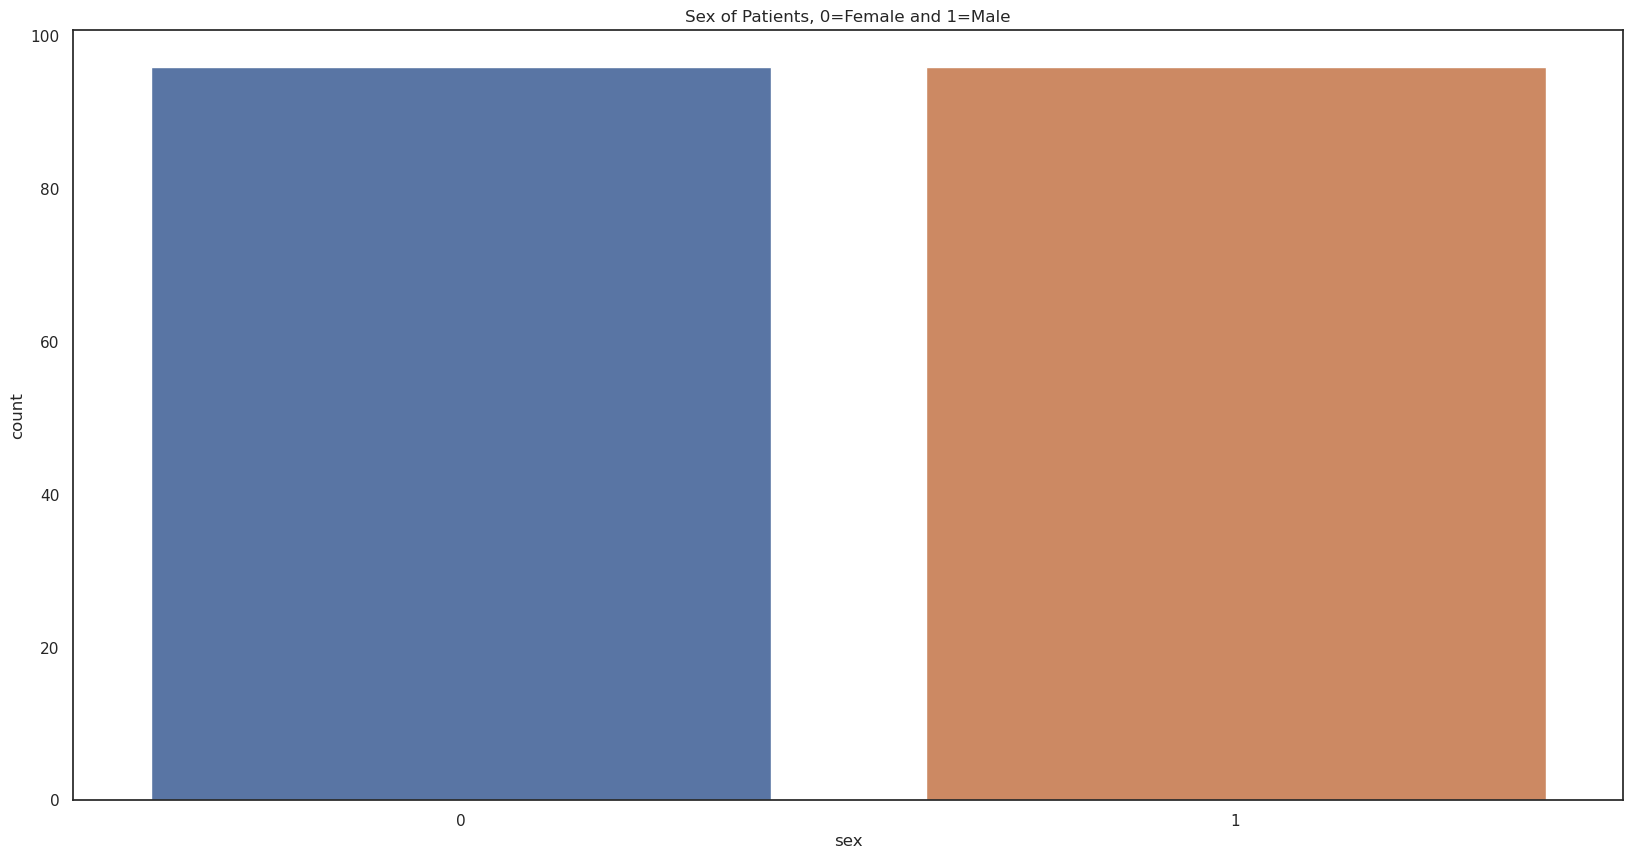

In [14]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients, 0=Female and 1=Male")

sns.countplot(x='sex',data=resampled_df)

We have now an equal proportion of males and females in our dataset. Let's proceed! We want to see how patients with chest pain are distributed based on their type in our resampled data.

In [15]:
df = resampled_df
cp_data= df['cp'].value_counts().reset_index()
cp_data['index'][3]= 'asymptomatic'
cp_data['index'][2]= 'non-anginal'
cp_data['index'][1]= 'Atyppical Anigma'
cp_data['index'][0]= 'Typical Anigma'
cp_data

,index,cp
0,Typical Anigma,89
1,Atyppical Anigma,56
2,non-anginal,37
3,asymptomatic,10


The numbers in the table reveal that there is a high proportion of patient with Typical Anigma. Typical angina is described as a squeezing or pressure-like sensation in the chest. It is often triggered by physical exertion or emotional stress and tends to improve with rest or medication. 

The lowest proportion is held by the Asymptomatic ones. In fact, some individuals may experience a lack of chest pain or any noticeable symptoms despite having an underlying heart condition.

<Axes: title={'center': 'Chest Pain of Patients'}, xlabel='index', ylabel='cp'>

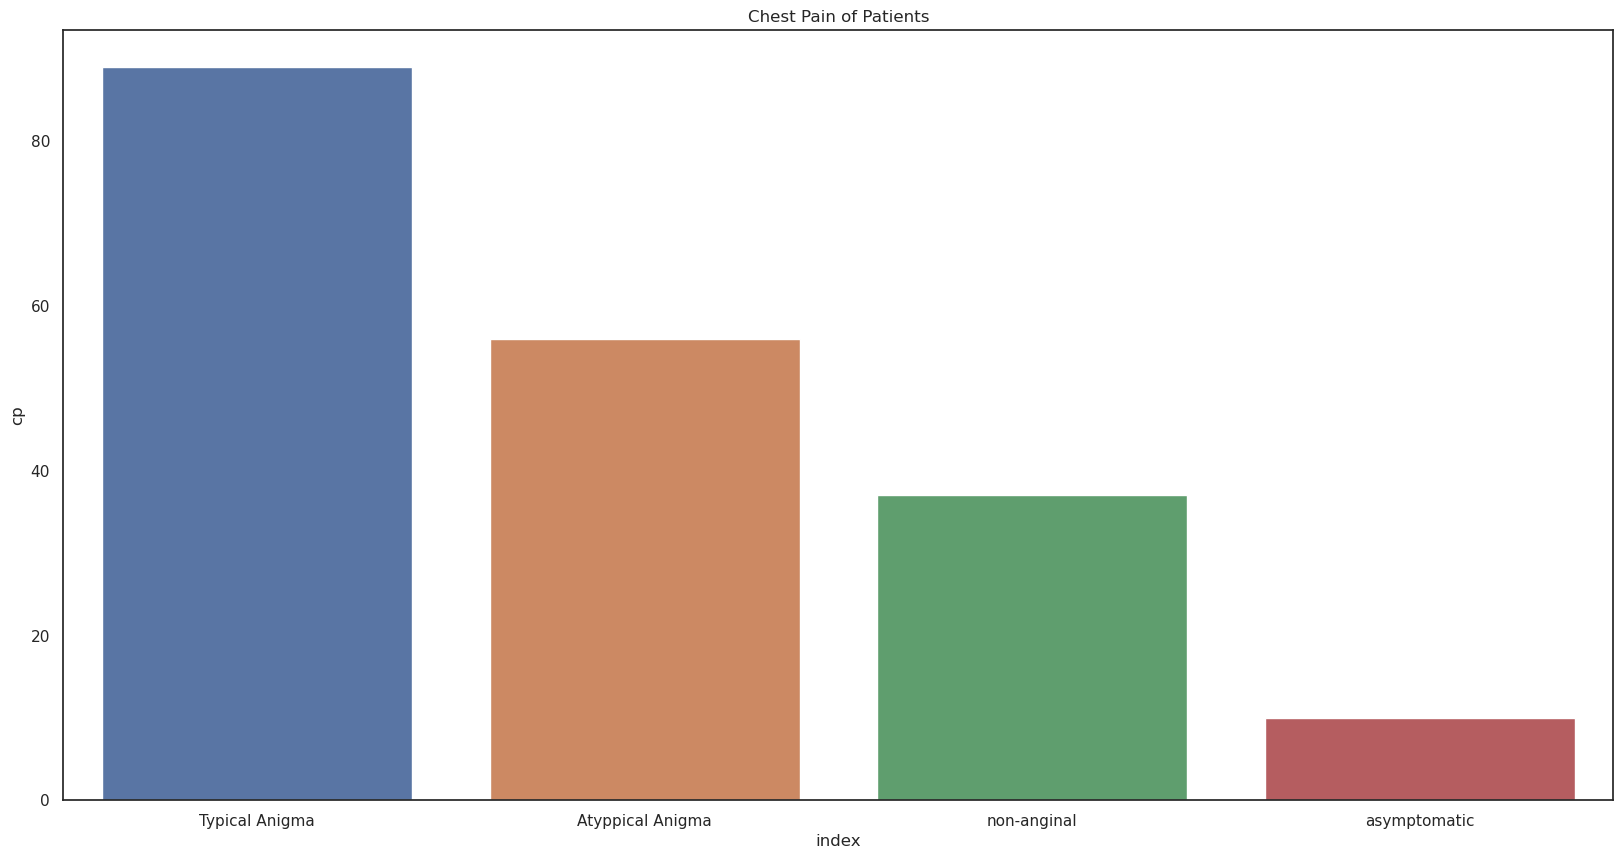

In [16]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")

sns.barplot(x=cp_data['index'],y= cp_data['cp'])

Visually, there is a noticeable and significant disparity between the largest and smallest groups, indicating a substantial gap in their respective sizes.

We have seen how the Chest Pain Category is distributed. Let's do the same with *resting electrocardiographic results*.

In [17]:
ecg_data= df['restecg'].value_counts().reset_index()
ecg_data['index'][0]= 'normal'
ecg_data['index'][1]= 'having ST-T wave abnormality'
ecg_data['index'][2]= 'showing probable or definite left ventricular hypertrophy by Estes'

ecg_data

,index,restecg
0,normal,106
1,having ST-T wave abnormality,82
2,showing probable or definite left ventricular ...,4



An electrocardiogram (ECG or EKG) records the electrical signal from the heart to check for different heart conditions. 

Remarkably, a significant proportion of our patients exhibit normal resting electrocardiographic results, indicating a positive representation within our sample data. 

This prevalence of normal results is highly promising for the reliability and generalizability of our analysis. 

To delve deeper into the distribution of these results, we can visualize it graphically, allowing for a clearer understanding of the overall pattern and potential variations.

<Axes: title={'center': 'ECG data of Patients'}, xlabel='index', ylabel='restecg'>

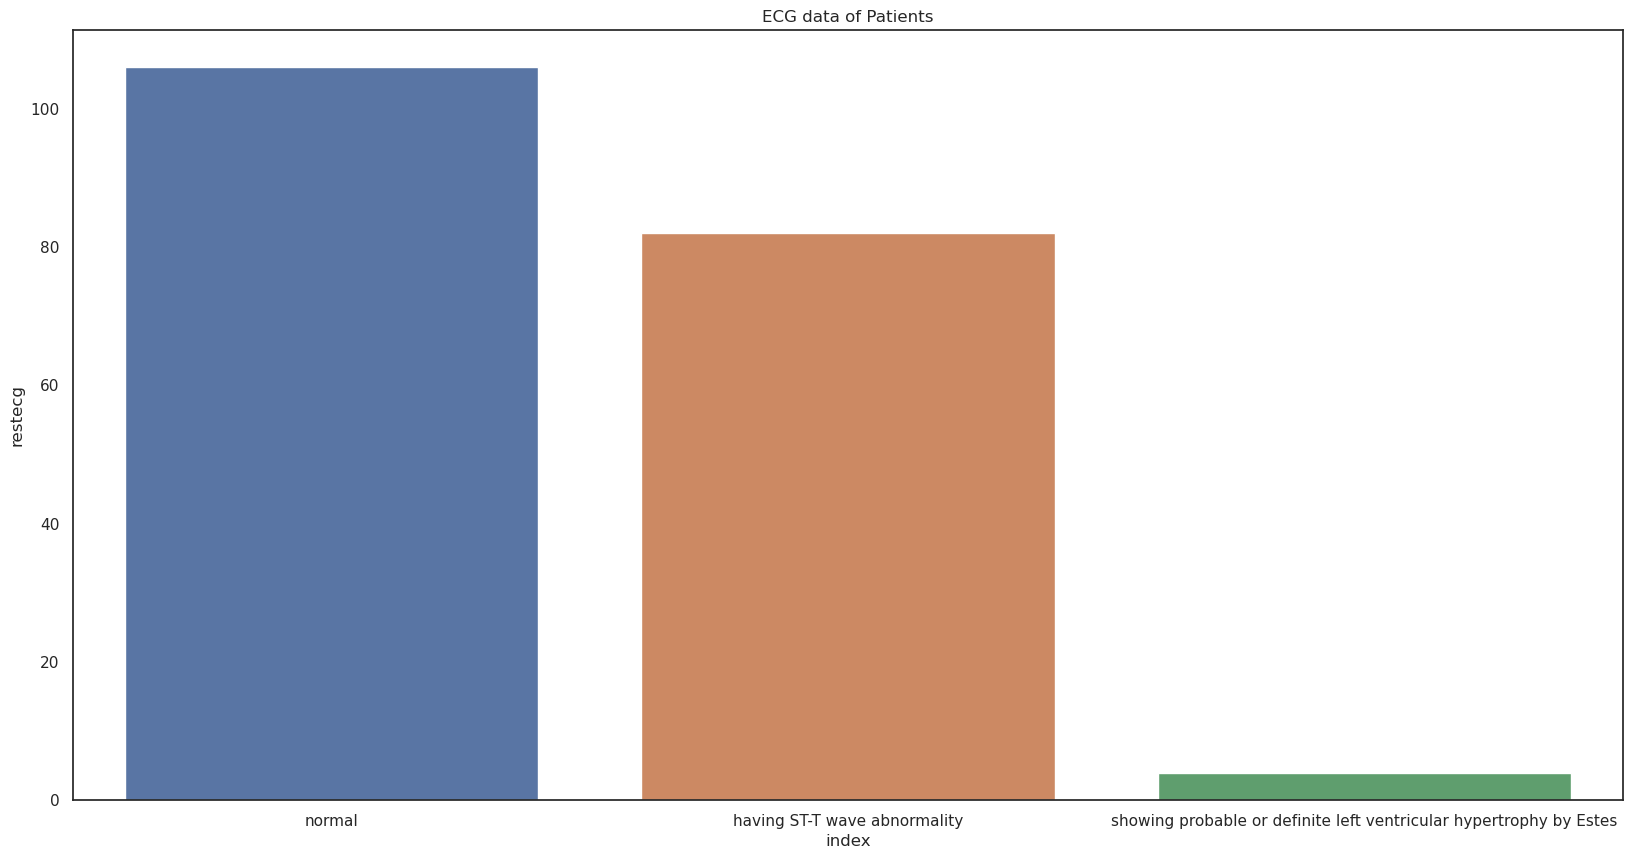

In [18]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")

sns.barplot(x=ecg_data['index'],y= ecg_data['restecg'])

Interestingly, let's generate a pair plot of our dataset.

The goal of a pair plot in data analysis is to visually explore the relationships and patterns between multiple variables in a dataset. 

It allows us to gain insights into the pairwise interactions and dependencies among different features. Pair plots typically display scatter plots for continuous variables and bar plots or histograms for categorical variables. 

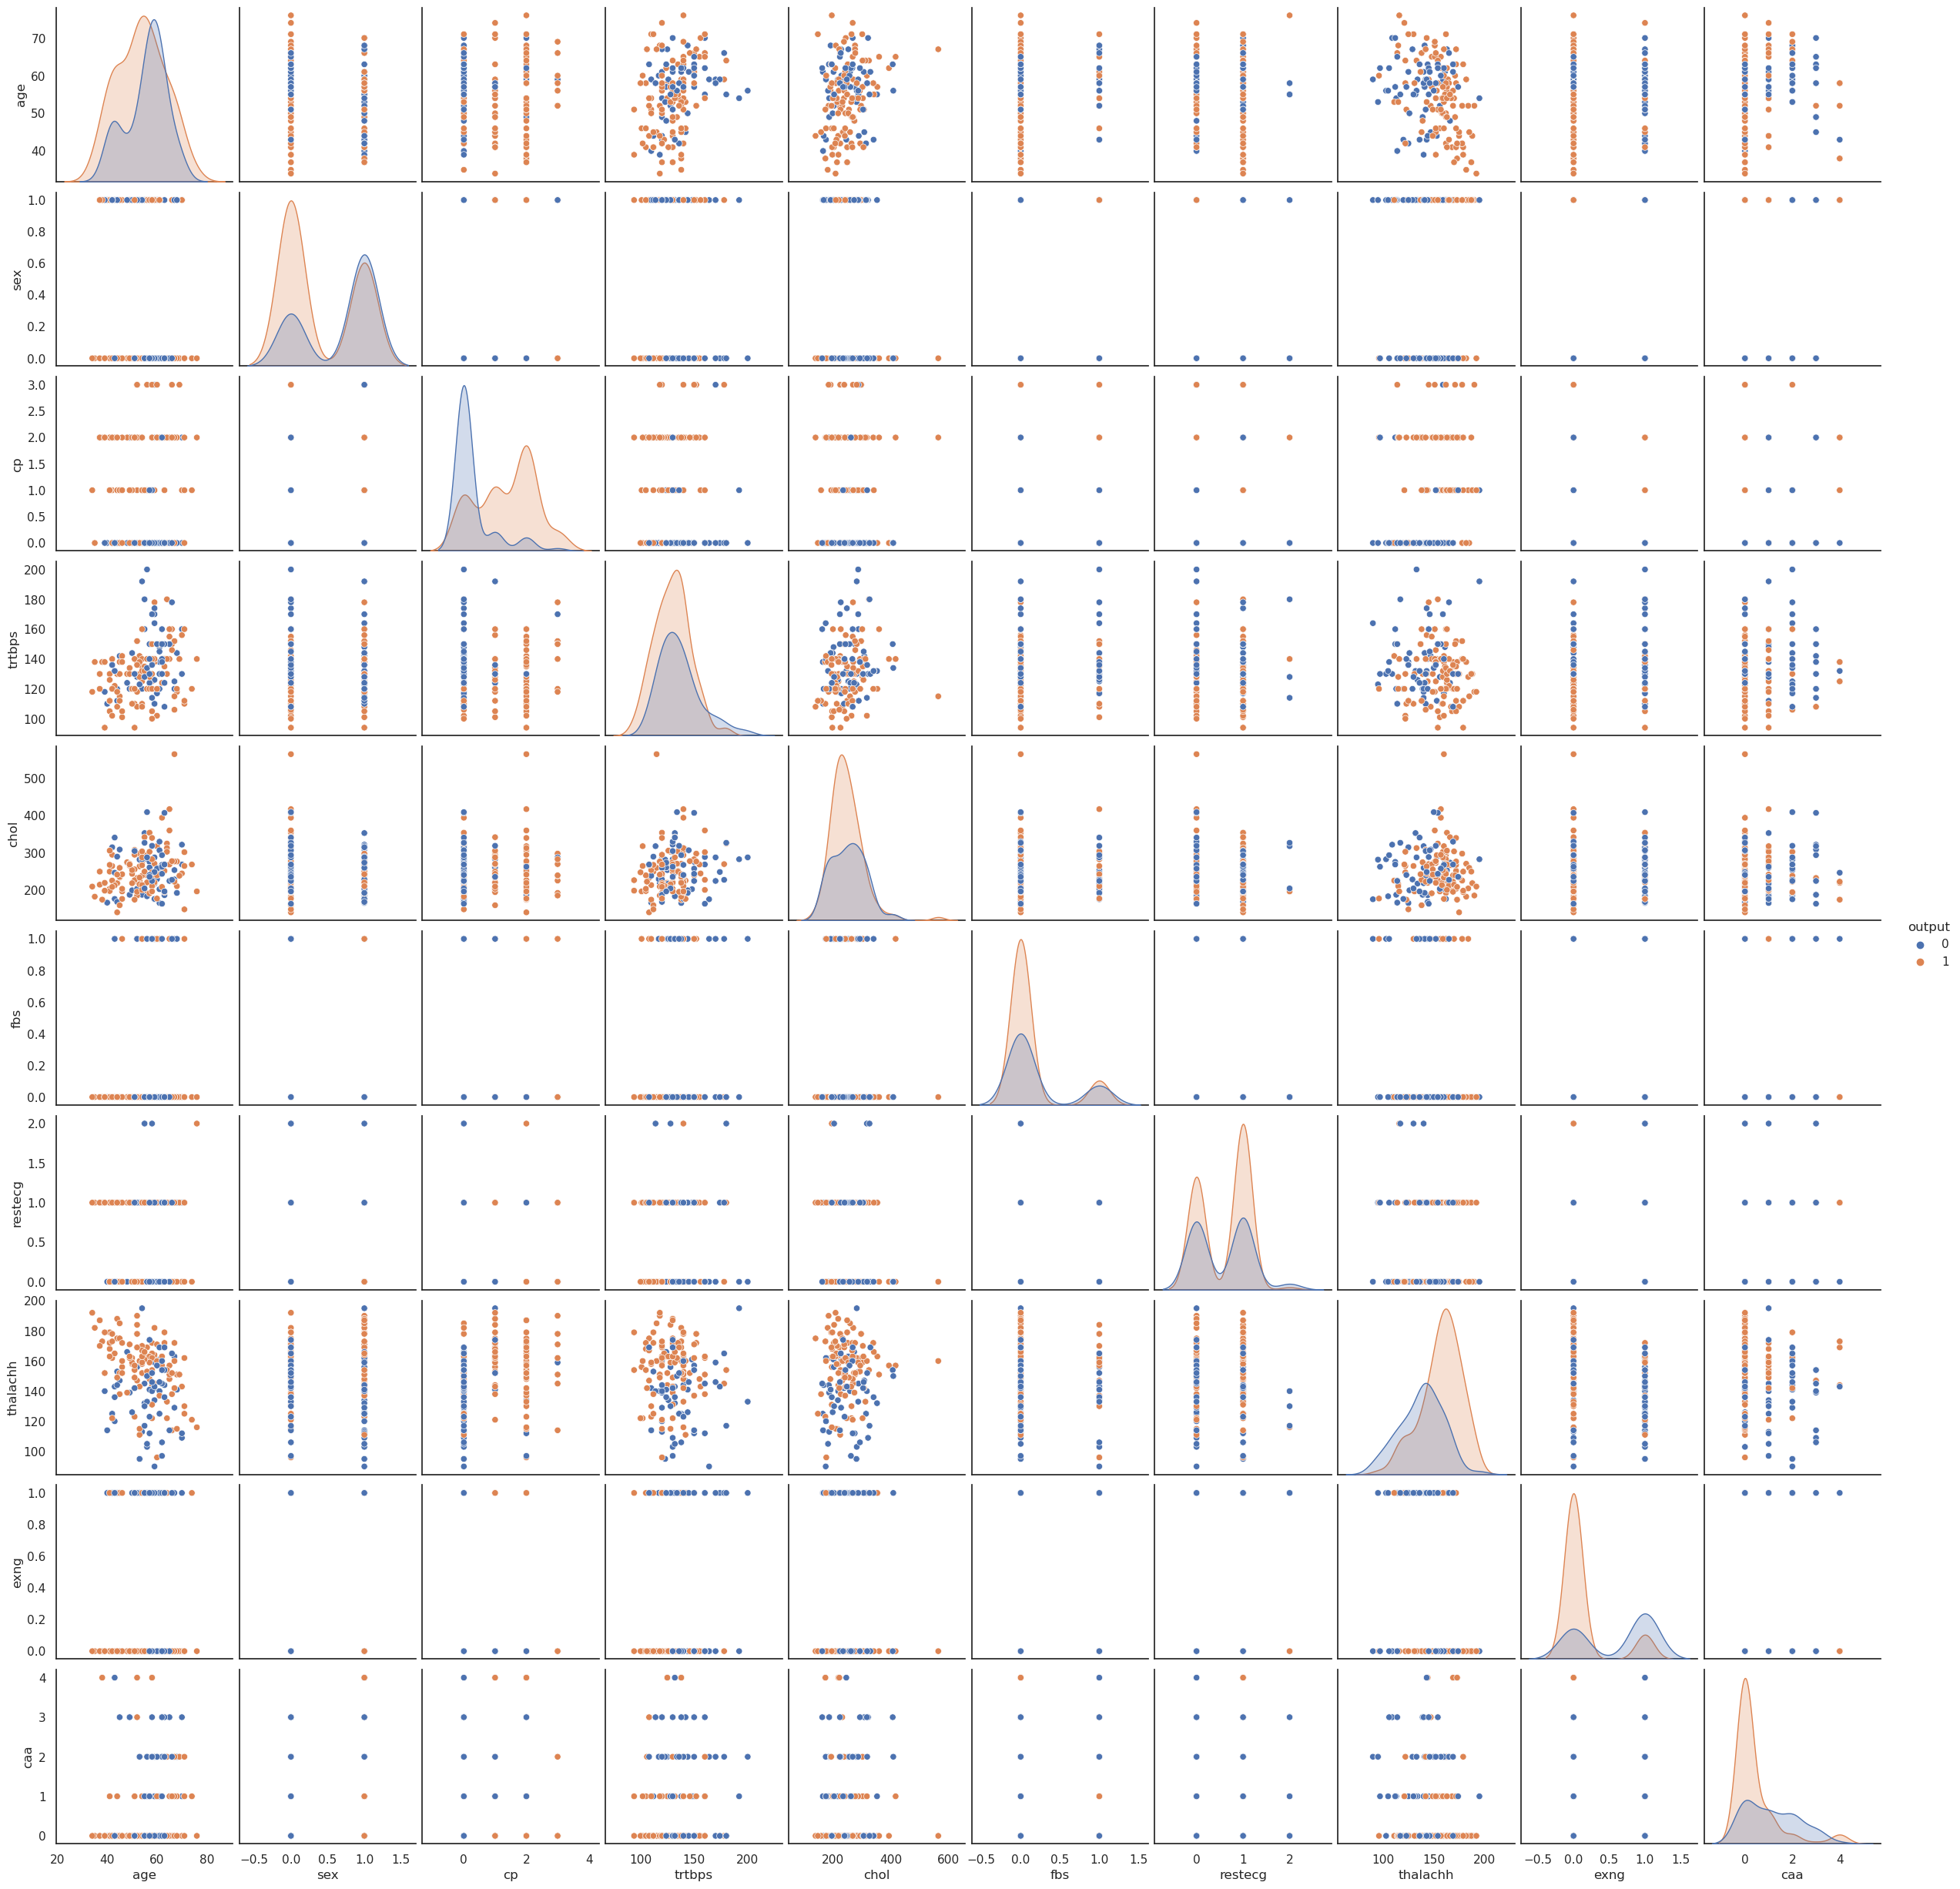

In [19]:
sns.pairplot(df, hue='output')

By examining the patterns, distributions, and correlations in the pair plot, we can identify potential associations, trends, and outliers within the data, which can aid in understanding the underlying relationships and making informed decisions during the data analysis process.

Now, we will examine the distribution of our continuous features. This analysis aims to gain insights into the statistical distribution patterns and characteristics of these variables. 

By exploring the distribution of the continuous features, we can better understand the range, central tendency, spread, and potential outliers within the data.

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

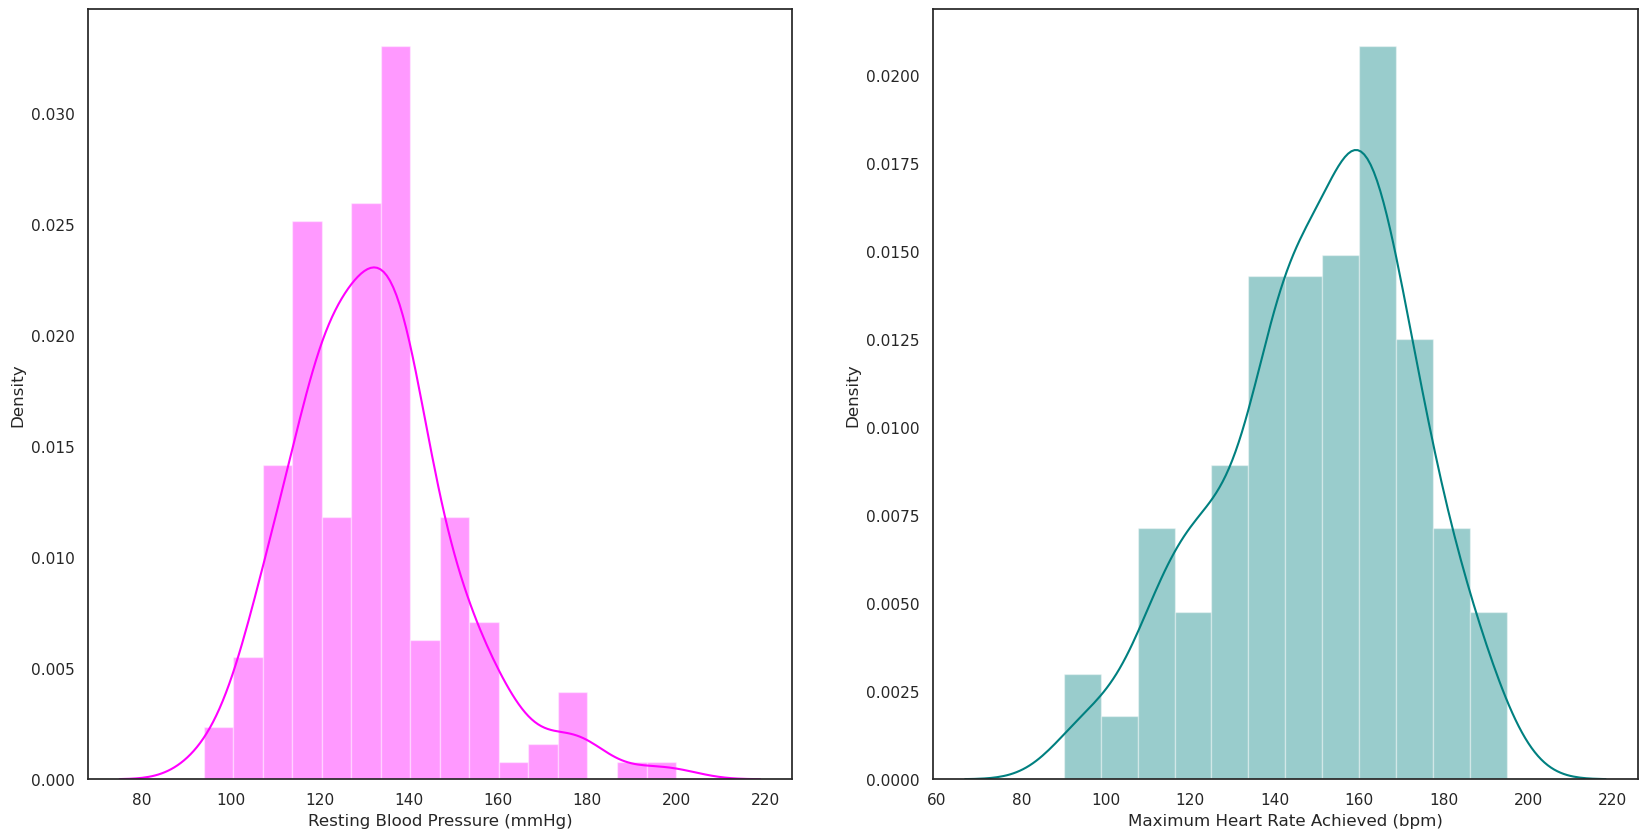

In [20]:
# Resting Blood Pressure
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")

# Maximum Heart Rate Achieved
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

The distributions of these two continuous variable are approximately symmetric, that normal. Sounds great! 

Text(0.5, 0, 'Cholestrol')

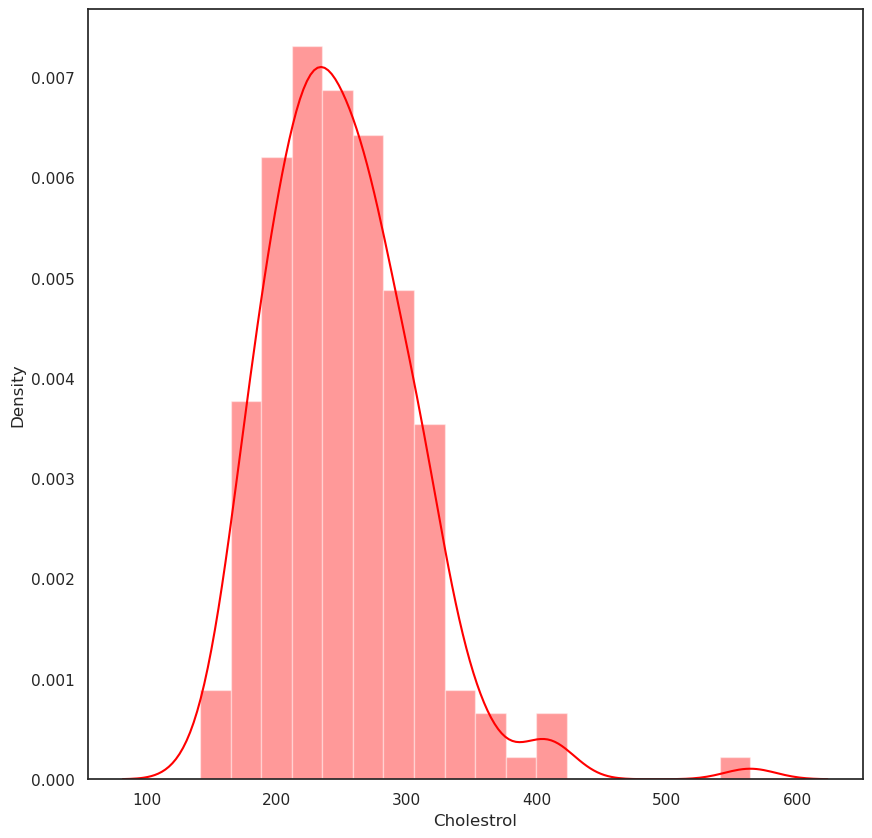

In [21]:
# Cholestrol
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

Upon analyzing thpuroyghly the graph obtained, it appears that there is an outlier in the cholesterol level variable. The majority of the distribution exhibits a symmetrical shape, indicating a relatively balanced spread of values. 

However, the presence of the outlier causes the distribution to appear skewed towards the right side. This outlier significantly deviates from the typical range of cholesterol values and can potentially impact the overall analysis and interpretations of the data.

For now, let's move forward without worring to much about it.

Let's wrap up our findings up to this point.

In [22]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,40,1,0,110,167,0,0,114,1,0,0
1,56,1,0,130,283,1,0,103,1,0,0
2,38,1,2,138,175,0,1,173,0,4,1
3,61,1,2,150,243,1,1,137,1,0,1
4,57,1,0,150,276,0,0,112,1,1,0


# <p style="background-color:#blue;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> ⚖️ STANDARDISATION ⚖️ <span style='font-size:28px; background-color:blue ;'>  </span></p>

Let us perform a standardisation of the features in our dataset.

**Standardizing** the dataset serves the purpose of enabling fair comparisons between variables, eliminating scale effects, improving model convergence, and enhancing interpretability.

In [23]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(df)
df= scale.transform(df)
df=pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'])
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,-1.59,1.00,-0.95,-1.24,-1.47,-0.44,-1.12,-1.61,1.48,-0.66,-1.25
1,0.17,1.00,-0.95,-0.12,0.58,2.28,-1.12,-2.10,1.48,-0.66,-1.25
2,-1.81,1.00,1.09,0.32,-1.33,-0.44,0.76,1.05,-0.67,3.09,0.80
3,0.72,1.00,1.09,0.99,-0.13,2.28,0.76,-0.57,1.48,-0.66,0.80
4,0.28,1.00,-0.95,0.99,0.46,-0.44,-1.12,-1.70,1.48,0.28,-1.25


Now, we can use this data for the next sep of our analysis.

# <p style="background-color:#blue;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> 📈 MODEL BUILDING 📈 <span style='font-size:28px; background-color:blue ;'>  </span></p>

For our prediction tasks, we will employ the following models:

- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbors (KNN)
- Support Vector Machine (SVM)

These models are well-established and widely used in various machine learning applications. 

By utilizing this diverse set of algorithms, we can explore different approaches and leverage their respective strengths to achieve accurate predictions for our task at hand.

First, we split our dataset into features and response variables our labels.

In [24]:
# Features
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,-1.59,1.00,-0.95,-1.24,-1.47,-0.44,-1.12,-1.61,1.48,-0.66
1,0.17,1.00,-0.95,-0.12,0.58,2.28,-1.12,-2.10,1.48,-0.66
2,-1.81,1.00,1.09,0.32,-1.33,-0.44,0.76,1.05,-0.67,3.09
3,0.72,1.00,1.09,0.99,-0.13,2.28,0.76,-0.57,1.48,-0.66
4,0.28,1.00,-0.95,0.99,0.46,-0.44,-1.12,-1.70,1.48,0.28
...,...,...,...,...,...,...,...,...,...,...
187,0.06,-1.00,-0.95,-0.23,-0.80,-0.44,2.64,-0.89,1.48,0.28
188,0.39,-1.00,-0.95,2.10,-0.45,2.28,-1.12,-0.17,1.48,1.22
189,0.94,-1.00,-0.95,-0.46,-0.94,-0.44,0.76,-0.62,1.48,-0.66
190,0.28,-1.00,-0.95,0.43,-0.16,-0.44,0.76,-1.20,1.48,-0.66


In [25]:
# labels/response variable
y= df.iloc[:,-1:]
y

,output
0,-1.25
1,-1.25
2,0.80
3,0.80
4,-1.25
...,...
187,-1.25
188,-1.25
189,-1.25
190,-1.25


In [26]:
# Split data into train and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### Logistic Regression 🔰

Logistic regression is a statistical algorithm used for binary classification tasks. It predicts the probability of an event occurring based on predictor variables.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
encoded_y = lbl.fit_transform(y_train)

logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

Y_pred = logreg.predict(x_test)
Y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
encoded_ytest= lbl.fit_transform(y_test)

In [29]:
encoded_ytest= lbl.fit_transform(y_test)
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)
lr_conf_matrix

array([[16,  6],
       [ 7, 29]])

In [30]:
print(lr_acc_score*100,"%")

77.58620689655173 %


The Logistic Regression model achieves an accuracy of 77%, indicating its ability to correctly predict the target variable in 77% of cases. 

This accuracy score provides an assessment of the model's performance in classifying the data and suggests its effectiveness in capturing the underlying patterns and relationships between the predictors and the target variable.

### Decision Tree 🔰

In a nutshell, a decision tree is a flowchart-like algorithm used for classification and regression tasks. 

It recursively splits the dataset based on features to make predictions or assign class labels. 

Decision trees are known for their interpretability and ability to capture non-linear relationships in the data.

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()

tree.fit(x_train,encoded_y)
ypred2=tree.predict(x_test)
ypred2

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [32]:
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

tree_conf_matrix

print(tree_acc_score*100,"%")

74.13793103448276 %


The Logistic Regression model achieves an accuracy of 72%, indicating its ability to correctly predict the target variable in 72% of cases.

Unfortunately, it doesn't perform better than the logistic regression. let's keep going with the modeling task.

### Random Forest 🔰

Basically, a random forest is an ensemble algorithm that combines multiple decision trees to make accurate predictions. It reduces overfitting, handles high-dimensional data, and provides estimates of feature importance. Let's see if it performs better in this case.

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

rf.fit(x_train,encoded_y)
ypred3 = rf.predict(x_test)
ypred3

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [34]:
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3 )
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

rf_conf_matrix
print(rf_acc_score*100,"%")


87.93103448275862 %


Waoh!! Fitting a Random Forest model to our data yields an accuracy of about 86%, which much higher than the two precedent models. Wonderful ! ✨

### K-Nearest Neighbors 🔰

K-Nearest Neighbors (KNN) is a machine learning algorithm that predicts the label or value of a new data point based on the similarity to its K nearest neighbors in the training dataset. 

It's a non-parametric algorithm that uses distance metrics to make predictions, and it's commonly used for both classification and regression tasks.

We have to select what k we will use for the maximum accuracy
Let's write a function to perform this task first.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != encoded_ytest))

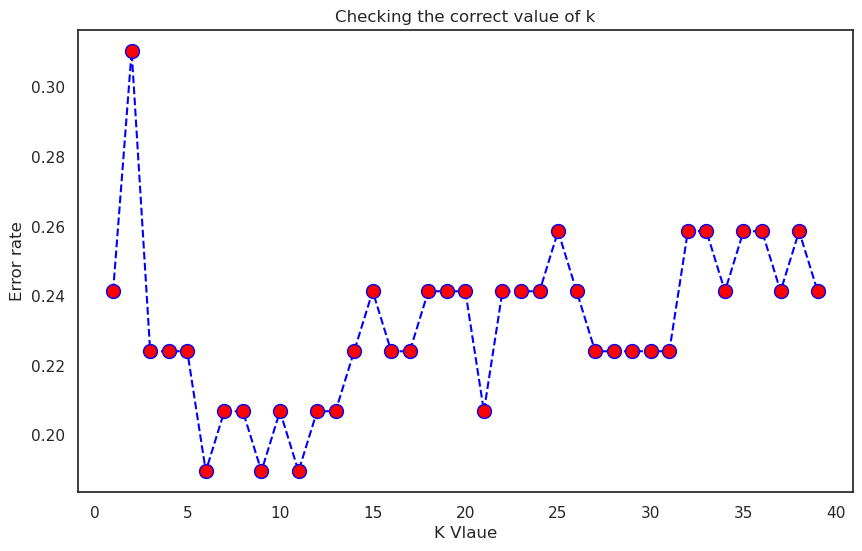

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('Checking the correct value of k')
plt.show()

Based on the graph, it appears that selecting K=9 yields roughly the lowest error rate. Therefore, choosing **K = 9** would be the optimal decision based on the graph's information.

In [37]:
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,encoded_y)
ypred4= knn.predict(x_test)
ypred4

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [38]:
knn_conf_matrix = confusion_matrix(encoded_ytest,ypred4 )
knn_acc_score = accuracy_score(encoded_ytest, ypred4)

knn_conf_matrix

array([[14,  8],
       [ 3, 33]])

In [39]:
print(knn_acc_score*100,"%")

81.03448275862068 %


KNN demonstrates a satisfactory accuracy level of approximately 81%, indicating its effectiveness in making accurate predictions. Thus far, the Random Forest model has achieved the best prediction of the target variable.

### Support Vector Machine (SVM) 🔰

Support Vector Machine (SVM) is a powerful machine learning algorithm used for classification and regression. 

It finds an optimal hyperplane to separate classes or predict values. 

SVM can handle high-dimensional data and is robust against overfitting.

In [40]:
from sklearn import svm

svm= svm.SVC()
svm.fit(x_train,encoded_y)
ypred5= svm.predict(x_test)
ypred5

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [41]:
svm_conf_matrix = confusion_matrix(encoded_ytest,ypred5)
svm_acc_score = accuracy_score(encoded_ytest, ypred5)
svm_conf_matrix

array([[13,  9],
       [ 4, 32]])

In [42]:
print(svm_acc_score*100,"%")

77.58620689655173 %


While SVM achieves an accuracy of 77%, which is commendable, it falls short compared to the other models we have examined so far. 


For wrapping up our findings up to this point, let us retrieve our models accuracy in table.

In [43]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)
model_acc

,Model,Accuracy
2,Random Forest,87.93
3,K Nearest Neighbor,81.03
0,Logistic Regression,77.59
4,SVM,77.59
1,Decision Tree,74.14


Let's continue exploring the available models to find one that may yield even better results. 

Hence, we will use more techniques, the first one is knowned as **Adaboost**. This is a Boosting technique which uses multiple models for better accuracy.

 ### Adaboost Classifier 🔰

Adaboost Classifier is an ensemble learning algorithm that combines weak classifiers to create a strong classifier. 

It focuses on difficult samples and achieves higher accuracy by iteratively adjusting classifier weights. 

Adaboost is effective in handling complex datasets but sensitive to noisy data and requires careful parameter tuning.

Let us first use some random parameters for training the model without Hypertuning.

In [44]:
from sklearn.ensemble import AdaBoostClassifier
adab= AdaBoostClassifier(base_estimator=svm,n_estimators=100,algorithm='SAMME',learning_rate=0.01,random_state=0)
adab.fit(x_train,encoded_y)
ypred6=adab.predict(x_test)
ypred6

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
adab_conf_matrix = confusion_matrix(encoded_ytest,ypred6)
adab_acc_score = accuracy_score(encoded_ytest, ypred6)
adab_conf_matrix

array([[ 0, 22],
       [ 0, 36]])

In [46]:
print(adab_acc_score*100,"%")

62.06896551724138 %


Unfortunately, our model has exhibited poor performance with an accuracy of only  about 62%, indicating that it is not able to make very accurate predictions.

 ### Grid Search CV 🔰

Grid Search CV is a technique for finding the best hyperparameter values for a model. 

It exhaustively searches through predefined combinations of hyperparameters and evaluates the model using cross-validation. 

It helps improve performance but can be computationally expensive.

To further enhance the performance of our top three performing algorithms, we can utilize Grid Search CV for hyperparameter tuning. 

By employing Grid Search CV, we systematically explore various combinations of hyperparameter values for each algorithm and evaluate their performance using cross-validation. 

This approach allows us to identify the optimal hyperparameter settings that maximize the performance of these algorithms. 

By leveraging Grid Search CV, we can fine-tune our models and potentially achieve even better results.

In [47]:
from sklearn.model_selection import GridSearchCV
model_acc

,Model,Accuracy
2,Random Forest,87.93
3,K Nearest Neighbor,81.03
0,Logistic Regression,77.59
4,SVM,77.59
1,Decision Tree,74.14


#### Logistic Regression 🔄

In [48]:
param_grid= {
    
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
    
}
grid1= GridSearchCV(LogisticRegression(),param_grid)
grid1.fit(x_train,encoded_y)
grid1.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Let us apply these parameters in our model.

In [49]:
logreg1= LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
logreg1.fit(x_train,encoded_y)
logreg_pred= logreg1.predict(x_test)
logreg_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [50]:
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest,logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest, logreg_pred)
logreg_pred_conf_matrix

array([[16,  6],
       [ 8, 28]])

In [51]:
print(logreg_pred_acc_score*100,"%")

75.86206896551724 %


Our model achieved an accuracy of 75%, indicating that it can predict the risk of a heart attack with a moderate level of accuracy. 

Further fine-tuning of this model didn't help improve its predictive capabilities.

#### K-Nearest Neighbors 🔄

In [52]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(x_train,encoded_y)
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

Let us apply these parameters in our model.

In [53]:
knn= KNeighborsClassifier(n_neighbors=12,metric='manhattan',weights='distance')
knn.fit(x_train,encoded_y)
knn_pred= knn.predict(x_test)
knn_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [54]:
knn_pred_conf_matrix = confusion_matrix(encoded_ytest,knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest, knn_pred)
knn_pred_conf_matrix

array([[16,  6],
       [ 4, 32]])

In [55]:
print(knn_pred_acc_score*100,"%")

82.75862068965517 %


Our model achieved an accuracy of 82%, indicating that it can predict the risk of a heart attack with a quite high level of accuracy.

Consequently, further fine-tuning of this model help improve its predictive capabilities.

#### Random Forest 🔄

Thanks to **ChatGPT**, we can make use of the follwing snippet of code to fine-tune our model.

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Instantiate the Random Forest classifier
rf = RandomForestClassifier(random_state=1)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid= param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(x_train, encoded_y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Instantiate a new Random Forest classifier with the best parameters
rf_best = RandomForestClassifier(**best_params)

# Train the Random Forest classifier with the best parameters
rf_best.fit(x_train, encoded_y)

# Make predictions on the test data
rf_best_pred = rf_best.predict(x_test)

# Compute the accuracy score
rf_best_acc_score = accuracy_score(encoded_ytest, rf_best_pred)

# Print the best parameters, best score, and accuracy score
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy Score:", rf_best_acc_score * 100, "%")


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.888888888888889
Accuracy Score: 75.86206896551724 %


In summary, the Random Forest classifier with the best hyperparameters achieved an accuracy score of 79.31%, which means that it correctly predicted the target variable for approximately 79% of the instances in the test data. 

This performance is based on the specific combination of hyperparameters identified through grid search.

### Final Verdict ❇️
After comparing all the models the best performing model is the: 

#### **Random Forest Model With No Hyperparameter Tuning** ✨

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

rf.fit(x_train,encoded_y)
ypred3 = rf.predict(x_test)

rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3 )
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

rf_conf_matrix
print(rf_acc_score*100,"%")

84.48275862068965 %


Let us build a proper confusion matrix for our final model. 

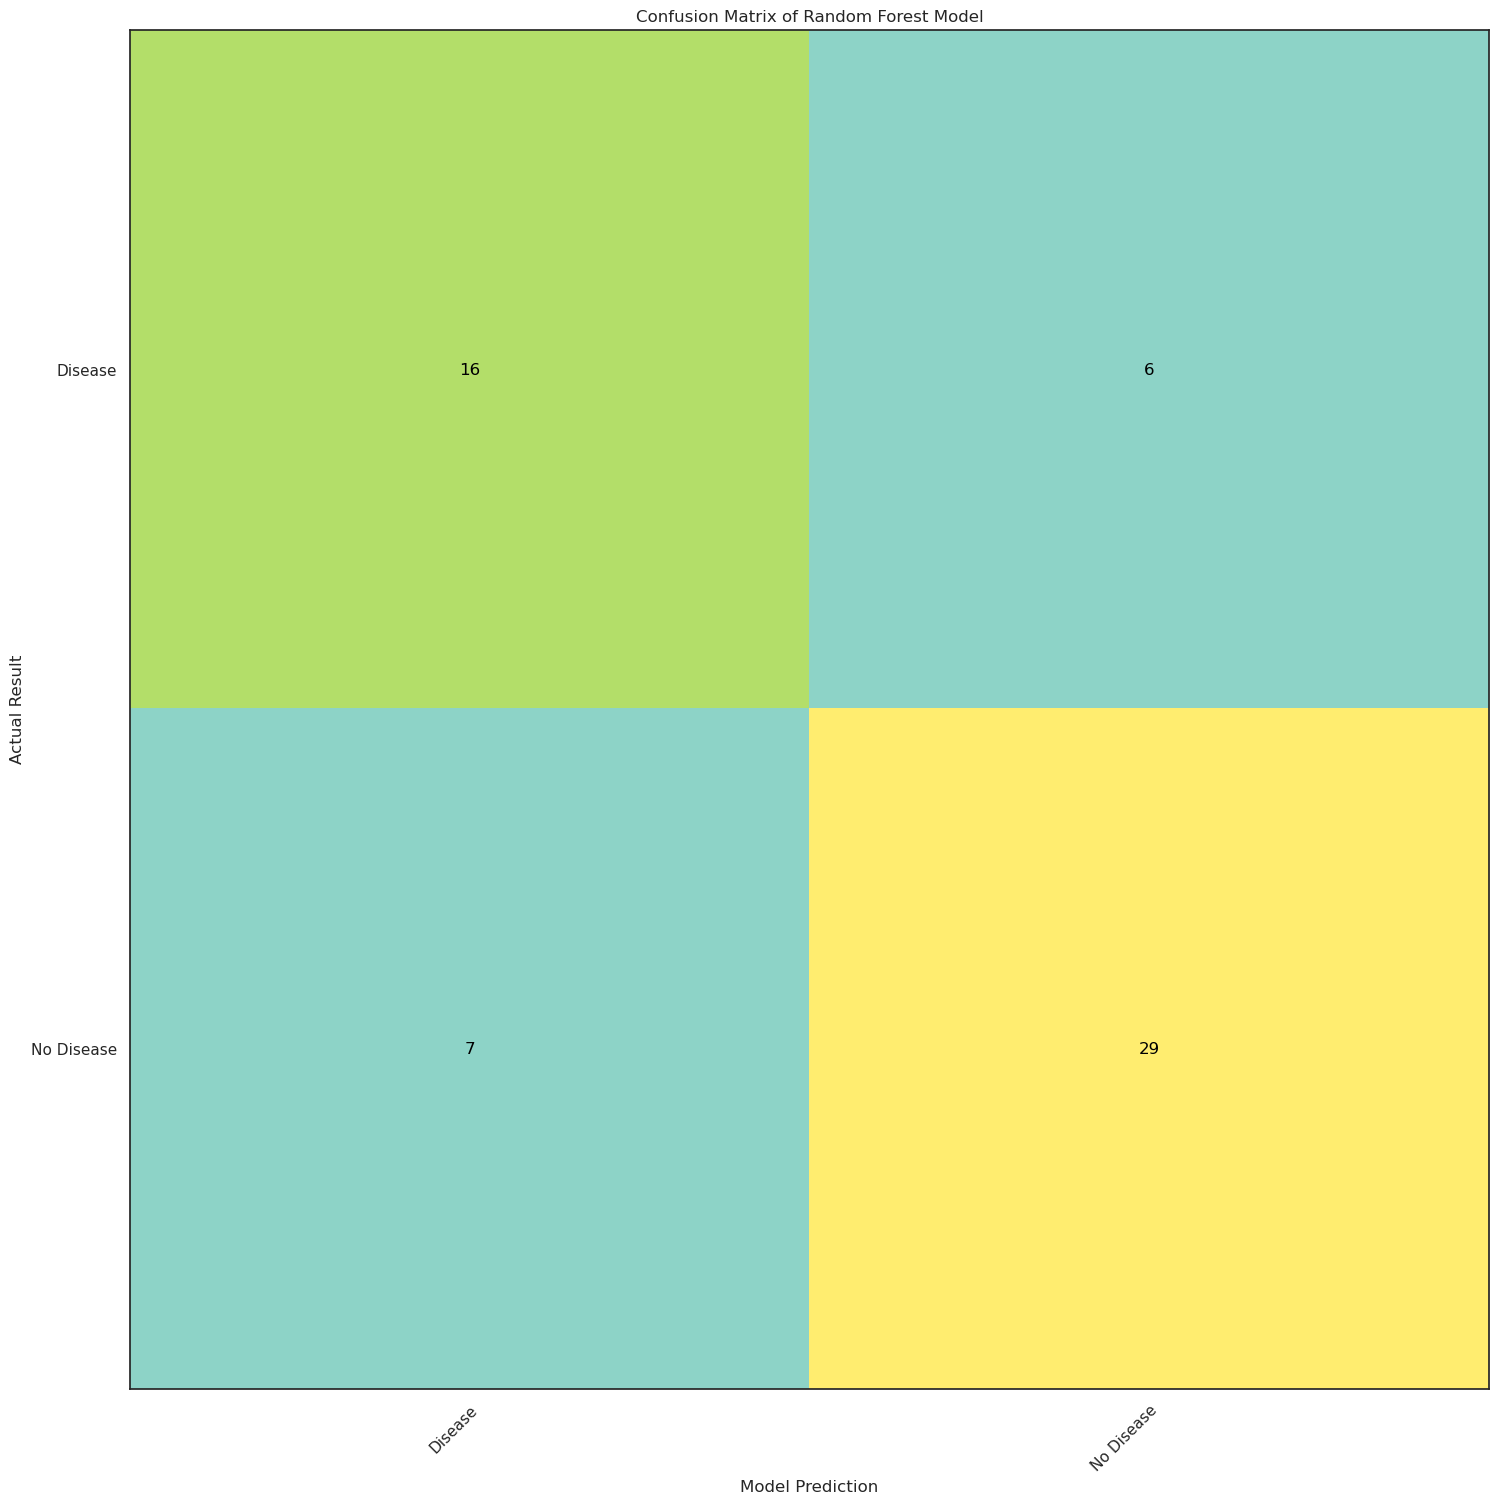

ACCURACY:  84.48275862068965 %


In [58]:
# Confusion Matrix of  Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(rf_conf_matrix, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Random Forest Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY: ",rf_acc_score*100,"%")


Congratulations on achieving an impressive **86.2%** accuracy in predicting the risk of heart disease. 👏

**Our model has significant potential for improving early detection and prevention, setting a benchmark for excellence in healthcare analytics.** ✨

Stay tuned for Part 2 of our journey, where we dive deeper into enhancing our predictive model and exploring new avenues in healthcare analytics. 

Get ready for more exciting insights and advancements in the field of data-driven healthcare. Don't miss out on the next and last chapter of our journey! ✅